## Sentimental analysis using LSTM network

In [1]:
from __future__ import print_function

In [2]:
# Importing libraries
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Conv1D, MaxPooling1D
from keras.datasets import imdb


C:\Users\NEHA\Python\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
# Embedding
max_features = 20000
maxlen = 100
embedding_size = 128

In [4]:
# Convolution
kernel_size = 5
filters = 64
pool_size = 4

In [5]:
# LSTM
lstm_output_size = 70

In [6]:
# Training
batch_size = 512
epochs = 20

In [6]:
#Spiltting data into training data and testing data
print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

Loading data...
25000 train sequences
25000 test sequences


In [7]:
# Printing shape of train and test data
print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)


Pad sequences (samples x time)
x_train shape: (25000, 100)
x_test shape: (25000, 100)


In [8]:
# Defining the model
print('Build model...')

model = Sequential()
model.add(Embedding(max_features, embedding_size, input_length=maxlen))
model.add(Dropout(0.25))
model.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1))
model.add(MaxPooling1D(pool_size=pool_size))
model.add(LSTM(lstm_output_size))
model.add(Dense(1))
model.add(Activation('sigmoid'))



Build model...


In [9]:
# We configure our model with the rmsprop optimizer and the binary_crossentropy loss function
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [11]:
# Fitting the model
print('Train...')
a=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 68s 3ms/step - loss: 0.5543 - acc: 0.7126 - val_loss: 0.3746 - val_acc: 0.8374
Epoch 2/20
25000/25000 [==============================] - 61s 2ms/step - loss: 0.2789 - acc: 0.8868 - val_loss: 0.3379 - val_acc: 0.8509
Epoch 3/20
25000/25000 [==============================] - 62s 2ms/step - loss: 0.1772 - acc: 0.9343 - val_loss: 0.3705 - val_acc: 0.8444
Epoch 4/20
25000/25000 [==============================] - 61s 2ms/step - loss: 0.1158 - acc: 0.9608 - val_loss: 0.4685 - val_acc: 0.8336
Epoch 5/20
25000/25000 [==============================] - 63s 3ms/step - loss: 0.0770 - acc: 0.9765 - val_loss: 0.5470 - val_acc: 0.8296
Epoch 6/20
25000/25000 [==============================] - 62s 2ms/step - loss: 0.0581 - acc: 0.9819 - val_loss: 0.5949 - val_acc: 0.8244
Epoch 7/20
25000/25000 [==============================] - 62s 2ms/step - loss: 0.0398 - acc: 0.9879 - val_loss: 0.6505 

In [ ]:
# The call to model.fit() returns a History object.This object has a member history, which is a dictionary
#containing data about everything that happened during training

In [12]:
history_dict = a.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

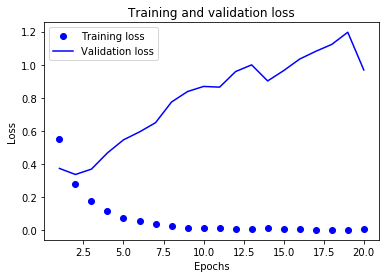

In [16]:
#Plotting training loss v/s validation loss
import matplotlib.pyplot as plt

#acc = history.history['acc']
#val_acc = history.history['val_acc']
acc = a.history['acc']
val_acc = a.history['val_acc']
loss = a.history['loss']
val_loss = a.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

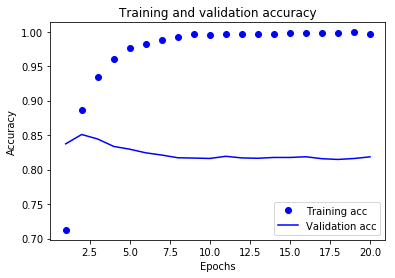

In [15]:
#Plotting training loss v/s validation accuracy
plt.clf()   # clear figure
#acc_values = history_dict['acc']
#val_acc_values = history_dict['val_acc']
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [10]:
# Training
batch_size = 512
epochs = 4
print('Train...')
a=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 65s 3ms/step - loss: 0.5549 - acc: 0.7117 - val_loss: 0.3745 - val_acc: 0.8372
Epoch 2/4
25000/25000 [==============================] - 61s 2ms/step - loss: 0.2791 - acc: 0.8868 - val_loss: 0.3379 - val_acc: 0.8512
Epoch 3/4
25000/25000 [==============================] - 62s 2ms/step - loss: 0.1772 - acc: 0.9347 - val_loss: 0.3708 - val_acc: 0.8443
Epoch 4/4
25000/25000 [==============================] - 15s 615us/step
Test score: 0.4687708903503418
Test accuracy: 0.8334000003433227


In [11]:
# Evaluation
results = model.evaluate(x_test, y_test)

25000/25000 [==============================] - 20s 782us/step


In [12]:
# Printing results
results

[0.4687708914089203, 0.8334]

We have achieved an accuracy of 83 %

In [13]:
# Predicting the model
model.predict(x_test)

array([[0.28689626],
       [0.99747133],
       [0.9871952 ],
       ...,
       [0.04059447],
       [0.15112427],
       [0.8717716 ]], dtype=float32)

ref[1]: https://medium.com/@thoszymkowiak/how-to-implement-sentiment-analysis-using-word-embedding-and-convolutional-neural-networks-on-keras-163197aef623

The text in the document by Neha Gaikwad and Nupur Deshpande is licensed under CC BY 3.0 https://creativecommons.org/licenses/by/3.0/us/
The code in the document by Neha Gaikwad and Nupur Deshpande is licensed under the MIT License https://opensource.org/licenses/MIT